# Guided Project: Answering Business Questions using SQL

## 2. Creating Helper Functions

In [1]:
#Import the SQLite, pandas and matplotlib modules, and use the magic command %matplotlib inline to make sure any plots render in the notebook.
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#Displaying the plot in a Jupyter Notebook
%matplotlib inline
import seaborn as sns

In [2]:
#Create a run_query() function, that takes a SQL query as an argument and returns a pandas dataframe of that query.
def run_query(q):
    with sqlite3.connect('chinook.db') as conn:
    # we can now access `conn`
        return pd.read_sql(q, conn)

In [3]:
#Create a run_command() function that takes a SQL command as an argument and executes it using the sqlite module.
def run_command(c):
    with sqlite3.connect('chinook.db') as conn:
        conn.isolation_level = None
        conn.execute(c)

In [4]:
#Create a show_tables() function that calls the run_query() function to return a list of all tables and views in the database.
def show_tables():
    query='''
    SELECT
        name,
        type
    FROM sqlite_master
    WHERE type IN ("table","view");
    '''
    return run_query(query)

In [5]:
#Run the show_tables() function.
show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


## 3.Selecting Albums to Purchase

In [6]:
#Write a query that returns each genre, with the number of tracks sold in absolute numbers and in percentages.

#Return list customers from USA
q1='''
    SELECT
        c.customer_id,
        c.country
    FROM customer c
    WHERE c.country="USA"
    '''
customers_usa=run_query(q1)
print(customers_usa)

#Return list invoices from USA customers
q2='''
    SELECT
        i.invoice_id,
        i.customer_id,
        c.country
    FROM invoice i
    LEFT JOIN customer c ON c.customer_id=i.customer_id
    WHERE c.country="USA"
    '''
invoices_usa=run_query(q2)
print(invoices_usa)

#Return list invoice lines from USA customers
q3='''
    SELECT
        il.invoice_id,
        il.track_id,
        i.customer_id,
        c.country
    FROM invoice_line il
    LEFT JOIN invoice i ON i.invoice_id=il.invoice_id
    LEFT JOIN customer c ON c.customer_id=i.customer_id
    WHERE c.country="USA"
    '''
invoice_lines_usa=run_query(q3)
print(invoice_lines_usa)

#Return list tracks including genre sold to USA customers
q4='''
    SELECT
        g.name genre,
        t.genre_id,
        t.track_id,
        il.invoice_id,
        il.track_id,
        i.customer_id,
        c.country
    FROM invoice_line il
    LEFT JOIN invoice i ON i.invoice_id=il.invoice_id
    LEFT JOIN customer c ON c.customer_id=i.customer_id
    LEFT JOIN track t ON t.track_id=il.track_id
    LEFT JOIN genre g ON g.genre_id=t.genre_id
    WHERE c.country="USA"
    '''
list_tracks_sold_usa=run_query(q4)
print(list_tracks_sold_usa)

#Return list with number of tracks per genre
q5='''
    SELECT
        g.name genre,
        COUNT(t.track_id) number_of_tracks_sold_ABS,
        ((COUNT(CAST(t.track_id as Float))*100)/1051) number_of_tracks_sold_REL
    FROM invoice_line il
    LEFT JOIN invoice i ON i.invoice_id=il.invoice_id
    LEFT JOIN customer c ON c.customer_id=i.customer_id
    LEFT JOIN track t ON t.track_id=il.track_id
    LEFT JOIN genre g ON g.genre_id=t.genre_id
    WHERE c.country="USA"
    GROUP BY 1
    ORDER BY 2 DESC;
    '''
number_of_tracks_sold_by_genre=run_query(q5)
print(number_of_tracks_sold_by_genre)

    customer_id country
0            16     USA
1            17     USA
2            18     USA
3            19     USA
4            20     USA
5            21     USA
6            22     USA
7            23     USA
8            24     USA
9            25     USA
10           26     USA
11           27     USA
12           28     USA
     invoice_id  customer_id country
0            66           16     USA
1            75           16     USA
2           257           16     USA
3           268           16     USA
4           289           16     USA
5           389           16     USA
6           551           16     USA
7           591           16     USA
8            98           17     USA
9           128           17     USA
10          129           17     USA
11          166           17     USA
12          207           17     USA
13          288           17     USA
14          290           17     USA
15          393           17     USA
16          436           17     US

(17, 3)


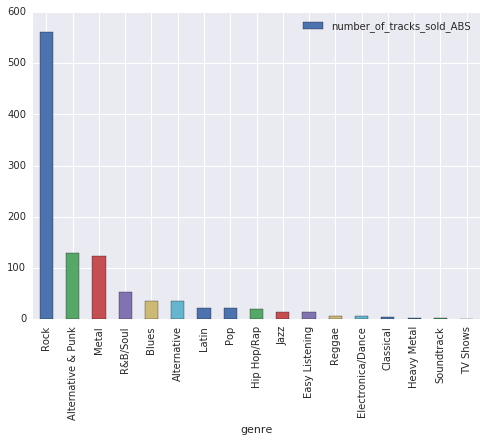

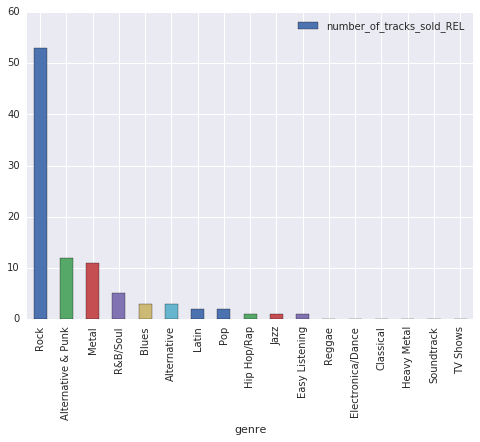

In [7]:
#Create a plot to show this data.
print(number_of_tracks_sold_by_genre.shape)
#number_of_tracks_sold_by_genre["number_of_tracks_sold_ABS"].plot(kind='bar')
number_of_tracks_sold_by_genre.plot.bar(x="genre",y="number_of_tracks_sold_ABS")
number_of_tracks_sold_by_genre.plot.bar(x="genre",y="number_of_tracks_sold_REL")

### Write a paragraph that interprets the data and makes a recommendation for the three artists whose albums we should purchase for the store, based on sales of tracks from their genres.

Number of unique USA customers = 13
Number of unique invoices from USA customers = 131
Number of tracks purchased by USA customers = 1051

Most popular genres in USA:
 
<l>-Punk (12%)
<l>-Blues (3%)
<l>-Pop (2%)
<l>-Hip-Hop (1%)

Based on sales of tracks from their genres, I would recommend to add the albums of the following three artists to the chinook store:

Artist Name => Genre
<l>Red Tone	=> Punk
<l>Slim Jim Bites => Blues
<l>Meteor and the Girls =>	Pop

It's worth keeping in mind that combined, these three genres only make up only 17% of total sales, so we should be on the lookout for artists and albums from the 'rock' genre, which accounts for 53% of sales.

## 4. Analyzing Employee Sales Performance

In [8]:
#Write a query that finds the total dollar amount of sales assigned to each sales support agent within the company. Add any extra attributes for that employee that you find are relevant to the analysis.

#Return list of sales support agents
q6='''
    SELECT
        e.*
    FROM employee e
    WHERE e.title="Sales Support Agent"
    '''

sales_support_agent=run_query(q6)
print(sales_support_agent)

#Return list of customer per sales support agent
q7='''
    SELECT
        e.first_name,
        c.*
    FROM customer c
    LEFT JOIN employee e ON e.employee_id=c.support_rep_id
    WHERE e.title="Sales Support Agent"
    ORDER BY 1
    '''

customer_per_ssa=run_query(q7)
print(customer_per_ssa)

#Return list number of customer per sales support agent
q8='''
    SELECT
        e.first_name,
        COUNT(c.customer_id) count
    FROM customer c
    LEFT JOIN employee e ON e.employee_id=c.support_rep_id
    WHERE e.title="Sales Support Agent"
    GROUP BY e.employee_id
    ORDER BY 1
    '''

number_customer_per_ssa=run_query(q8)
print(number_customer_per_ssa)

#Return list of unique country per sales support agent
q9='''
    SELECT
        e.first_name,
        c.country
    FROM customer c
    LEFT JOIN employee e ON e.employee_id=c.support_rep_id
    WHERE e.title="Sales Support Agent"
    GROUP BY c.country
    ORDER BY 1
    '''

country_per_ssa=run_query(q9)
print(country_per_ssa)

#Return list of company per sales support agent
q10='''
    SELECT
        e.first_name,
        c.company
    FROM customer c
    LEFT JOIN employee e ON e.employee_id=c.support_rep_id
    WHERE e.title="Sales Support Agent"
    GROUP BY c.company
    ORDER BY 1
    '''

company_per_ssa=run_query(q10)
print(company_per_ssa)

#Return list of invoices per sales support agent
q11='''
    SELECT
        e.first_name||" "||e.last_name sales_support_employee,
        COUNT(i.total) number_of_invoices,
        SUM(i.total) invoiced_total,
        (SUM(i.total)/COUNT(i.total)) total_per_invoice
    FROM invoice i
    LEFT JOIN customer c ON c.customer_id=i.customer_id
    LEFT JOIN employee e ON e.employee_id=c.support_rep_id
    WHERE e.title="Sales Support Agent"
    GROUP BY e.employee_id
    ORDER BY 1
    '''

invoices_per_ssa=run_query(q11)
print(invoices_per_ssa)



   employee_id last_name first_name                title  reports_to  \
0            3   Peacock       Jane  Sales Support Agent           2   
1            4      Park   Margaret  Sales Support Agent           2   
2            5   Johnson      Steve  Sales Support Agent           2   

             birthdate            hire_date           address     city state  \
0  1973-08-29 00:00:00  2017-04-01 00:00:00     1111 6 Ave SW  Calgary    AB   
1  1947-09-19 00:00:00  2017-05-03 00:00:00  683 10 Street SW  Calgary    AB   
2  1965-03-03 00:00:00  2017-10-17 00:00:00      7727B 41 Ave  Calgary    AB   

  country postal_code              phone                fax  \
0  Canada     T2P 5M5  +1 (403) 262-3443  +1 (403) 262-6712   
1  Canada     T2P 5G3  +1 (403) 263-4423  +1 (403) 263-4289   
2  Canada     T3B 1Y7   1 (780) 836-9987   1 (780) 836-9543   

                      email  
0      jane@chinookcorp.com  
1  margaret@chinookcorp.com  
2     steve@chinookcorp.com  
   first_name  cu

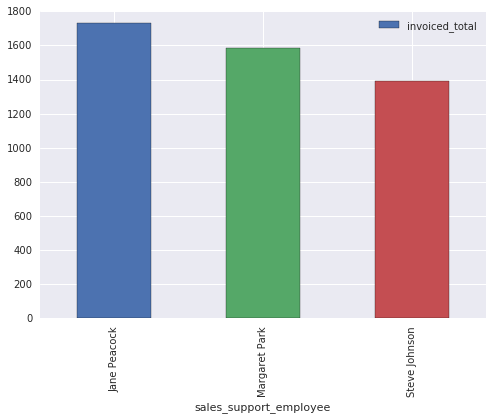

In [9]:
#Create a plot of the results of your query.
invoices_per_ssa.plot.bar(x="sales_support_employee",y="invoiced_total")

### Write a short statement describing your results, and providing a possible interpretation.

number of sales support agents = 3 (2females[45Y,71Y],1male[53y])
all ssa are hired in 2017 and they all live in Calgary, Canada.
number of customers = 59

Sales Profile Jane,Margaret,Steve
<l>age = 45,71,53
<l>hired since=2017,2017,2017
<l>number of customers= 21,20,18 (total 59)
<l>number of unique countries responsible=7,8,9 (total 24)
<l>number of company=5,3,3 (total 11)
<l>number of invoices=212,214,188
<l>number of invoice_total=1731,1584,1393
<l>total per invoice=8.16,7.4,7.4

Based on the analysis so far, Jane has the best sales performance. Although she is the youngest, she serves the most customers, the most companies, receives the most invoices, and has the most invoiced total. Second best is Margaret because the number of customers she serves, the number of invoices processed, and the invoiced total.

However, further research is neccessary. We should also take number of working hours into account. If Steve for example has 2 working days a week and Margaret has 5 working days a week, then Steve should be the second best at sales performance.

## 5. Analyzing Sales by Country

In [10]:
#Write a query that collates data on purchases from different countries. For each country, include:
#total number of customers
#total value of sales
#average value of sales per customer
#average order value
#The results should be sorted by the total sales from highest to lowest, with the "Other" group at the very bottom.

#Creating a view to list the necessary data
q12='''
    WITH country_customer AS
        (
        SELECT
            c.country,
            COUNT(c.customer_id) number_of_customers
        FROM customer c
        GROUP BY c.country
        )

    SELECT
        CASE
            WHEN cc.number_of_customers=1 THEN "Other"
            ELSE c.country
        END
        AS country,
        cc.number_of_customers total_number_of_customers,
        SUM(i.total) total_value_of_sales,
        (SUM(i.total)/cc.number_of_customers) aver_value_of_sales_per_cust,
        SUM(i.total)/COUNT(i.invoice_id) aver_order_value
    FROM invoice i
    LEFT JOIN customer c ON c.customer_id=i.customer_id
    INNER JOIN country_customer cc ON cc.country=c.country
    GROUP BY c.country
    ORDER BY 3 DESC


    '''
sales_by_country=run_query(q12)
print(sales_by_country)

           country  total_number_of_customers  total_value_of_sales  \
0              USA                         13               1040.49   
1           Canada                          8                535.59   
2           Brazil                          5                427.68   
3           France                          5                389.07   
4          Germany                          4                334.62   
5   Czech Republic                          2                273.24   
6   United Kingdom                          3                245.52   
7         Portugal                          2                185.13   
8            India                          2                183.15   
9            Other                          1                114.84   
10           Other                          1                 98.01   
11           Other                          1                 97.02   
12           Other                          1                 81.18   
13    

## Visualizing Sales by Country

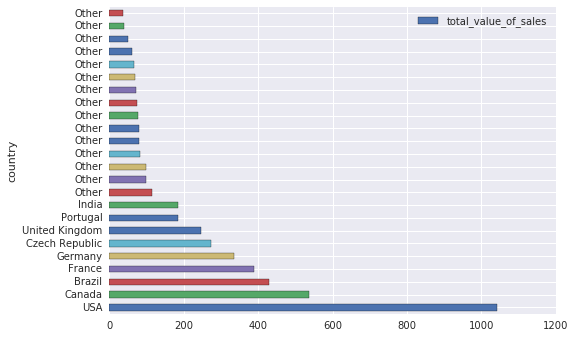

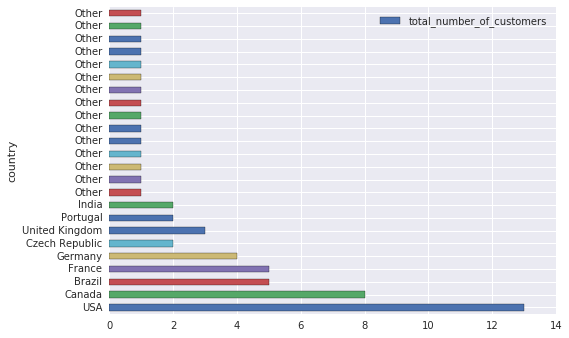

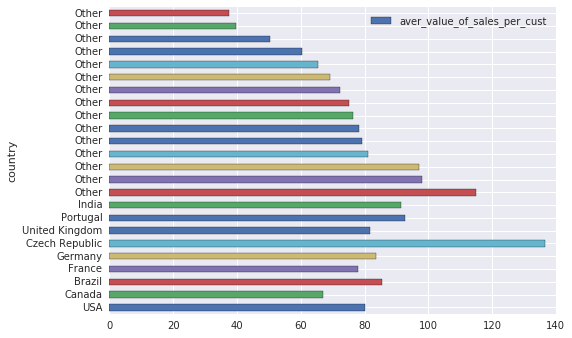

In [11]:
sales_by_country.plot.barh(x="country",y="total_value_of_sales")
sales_by_country.plot.barh(x="country",y="total_number_of_customers")
sales_by_country.plot.barh(x="country",y="aver_value_of_sales_per_cust")

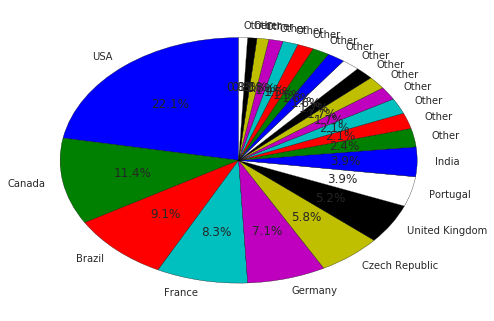

In [12]:
fig1, ax1 = plt.subplots()
sizes=sales_by_country["total_value_of_sales"]
labels=sales_by_country["country"]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.show()

### Write a few sentences interpreting your data and visualizations, and make one or more recommendations to the marketing team on which countries have potential for growth.

Based on the data, there may be opportunity in the following countries:

<l>Czech Republic
<l>United Kingdom
<l>India
It's worth keeping in mind that because the amount of data from each of these countries is relatively low. Because of this, we should be cautious spending too much money on new marketing campaigns, as the sample size is not large enough to give us high confidence. A better approach would be to run small campaigns in these countries, collecting and analyzing the new customers to make sure that these trends hold with new customers.

## Albums vs Individual Tracks

In [39]:
#Write a query that categorizes each invoice as either an album purchase or not, and calculates the following summary statistics:
#Number of invoices
#Percentage of invoices

#Return list album purchase
q13='''
    WITH 
        invoice_first_track_id_list AS
            (
            SELECT
                il.invoice_id,
                MIN(il.track_id) invoice_first_track_id,
                t.album_id
            FROM invoice_line il
            LEFT JOIN track t ON t.track_id=il.track_id
            GROUP BY invoice_id
            ),
        album_first_track_id_list AS
            (
            SELECT
                t.album_id,
                MIN(t.track_id) album_first_track_id
            FROM track t
            GROUP BY 1
            ),
        invoiced_albums_all_tracks AS
            (
            SELECT
                t.track_id invoiced_album_all_tracks_id,
                iftil.album_id
            FROM track t
            INNER JOIN invoice_first_track_id_list iftil ON iftil.album_id=t.album_id
            GROUP BY 1
            ),
        invoiced_tracks AS
            (
            SELECT
                il.track_id,
                t.album_id
            FROM invoice_line il
            LEFT JOIN track t ON t.track_id=il.track_id
            GROUP BY 1
            )
    
    SELECT
        CASE
            WHEN 
                (
                SELECT ia.invoiced_album_all_tracks_id 
                FROM invoiced_albums_all_tracks ia
                EXCEPT
                SELECT it.track_id 
                FROM invoiced_tracks it
                ) IS NULL

                AND

                (
                SELECT it.track_id 
                FROM invoiced_tracks it
                EXCEPT
                SELECT ia.invoiced_album_all_tracks_id 
                FROM invoiced_albums_all_tracks ia
                ) IS NULL
           
            THEN "Y"
            ELSE "N"
        END
        AS album_purchase,
        iftil.invoice_id number_of_invoices,
        (iftil.invoice_id/COUNT(DISTINCT iftil.invoice_id)) perc_of_invoices
    FROM invoice_first_track_id_list iftil
    GROUP BY album_purchase;
    '''

list_album_purchase=run_query(q13)
print(list_album_purchase)


  album_purchase  number_of_invoices  perc_of_invoices
0              N                 614                 1


### Write one to two sentences explaining your findings, and making a prospective recommendation on whether the Chinook store should continue to buy full albums from record companies

Album purchases account for 18.6% of purchases. Based on this data, I would recommend against purchasing only select tracks from albums from record companies, since there is potential to lose one fifth of revenue.

In [14]:
#Invoice first track
qtest='''
        SELECT
            il.invoice_id,
            MIN(il.track_id) invoice_first_track_id,
            t.album_id
        FROM invoice_line il
        LEFT JOIN track t ON t.track_id=il.track_id
        GROUP BY invoice_id
        ORDER BY 3
    '''
print(run_query(qtest))

     invoice_id  invoice_first_track_id  album_id
0            21                      13         1
1            23                       1         1
2            35                       6         1
3            42                      13         1
4            47                       8         1
5            63                       6         1
6            67                       9         1
7           107                       1         1
8           129                      12         1
9           203                       6         1
10          204                      14         1
11          232                       6         1
12          233                       9         1
13          252                       1         1
14          268                      13         1
15          304                      11         1
16          322                      13         1
17          327                       6         1
18          348                       9         1


In [15]:
#Album_first_track
qtest1='''

        SELECT
            t.album_id,
            MIN(t.track_id) album_first_track_id
        FROM track t
        GROUP BY 1



    '''
print(run_query(qtest1))

     album_id  album_first_track_id
0           1                     1
1           2                     2
2           3                     3
3           4                    15
4           5                    23
5           6                    38
6           7                    51
7           8                    63
8           9                    77
9          10                    85
10         11                    99
11         12                   111
12         13                   123
13         14                   131
14         15                   144
15         16                   149
16         17                   156
17         18                   166
18         19                   183
19         20                   194
20         21                   205
21         22                   223
22         23                   226
23         24                   246
24         25                   269
25         26                   282
26         27               

In [16]:
#Album all tracks
qtest2='''

        SELECT
            t.album_id,
            t.track_id album_first_track_id
        FROM track t
        GROUP BY 2
        ORDER BY 1



    '''
print(run_query(qtest2))

      album_id  album_first_track_id
0            1                     1
1            1                     6
2            1                     7
3            1                     8
4            1                     9
5            1                    10
6            1                    11
7            1                    12
8            1                    13
9            1                    14
10           2                     2
11           3                     3
12           3                     4
13           3                     5
14           4                    15
15           4                    16
16           4                    17
17           4                    18
18           4                    19
19           4                    20
20           4                    21
21           4                    22
22           5                    23
23           5                    24
24           5                    25
25           5                    26
2

In [32]:
#TEST
qtest3='''

    WITH 
        invoice_first_track_id_list AS
            (
            SELECT
                il.invoice_id,
                MIN(il.track_id) invoice_first_track_id,
                t.album_id
            FROM invoice_line il
            LEFT JOIN track t ON t.track_id=il.track_id
            GROUP BY invoice_id
            ),
        album_first_track_id_list AS
            (
            SELECT
                t.album_id,
                MIN(t.track_id) album_first_track_id
            FROM track t
            GROUP BY 1
            ),
        invoiced_albums_all_tracks AS
            (
            SELECT
                t.track_id invoiced_album_all_tracks_id,
                iftil.album_id
            FROM track t
            INNER JOIN invoice_first_track_id_list iftil ON iftil.album_id=t.album_id
            GROUP BY 1
            ),
        invoiced_tracks AS
            (
            SELECT
                il.track_id,
                t.album_id
            FROM invoice_line il
            LEFT JOIN track t ON t.track_id=il.track_id
            GROUP BY 1
            )
    
    

    SELECT *  
    FROM invoiced_tracks
    ORDER BY 2



    '''
print(run_query(qtest3))

      track_id  album_id
0            1         1
1            6         1
2            7         1
3            8         1
4            9         1
5           10         1
6           11         1
7           12         1
8           13         1
9           14         1
10           2         2
11           3         3
12           4         3
13           5         3
14          15         4
15          16         4
16          17         4
17          18         4
18          19         4
19          20         4
20          21         4
21          22         4
22          23         5
23          24         5
24          25         5
25          26         5
26          27         5
27          28         5
28          29         5
29          30         5
...        ...       ...
1776      3452       318
1777      3455       321
1778      3456       321
1779      3457       321
1780      3458       321
1781      3459       321
1782      3460       321
1783      3461       321


In [38]:
albums_vs_tracks = '''
WITH invoice_first_track AS
    (
     SELECT
         il.invoice_id invoice_id,
         MIN(il.track_id) first_track_id
     FROM invoice_line il
     GROUP BY 1
    )

SELECT t.track_id FROM track t
WHERE t.album_id = (
                  SELECT t2.album_id FROM track t2
                  WHERE t2.track_id = (
                                      SELECT ifs.first_track_id
                                      FROM invoice_first_track ifs
                                      )
                  ) 
'''

run_query(albums_vs_tracks)

,track_id
0,1158
1,1159
2,1160
3,1161
4,1162
5,1163
6,1164
7,1165
8,1166
9,1167
